# *ECUACIÓN DIFERENCIAL PARCIAL ELÍPTICA*

## A) DEMOSTRACIÓN GEOMÉTRICA.

### Ecuación de Laplace.

![EDP1](https://user-images.githubusercontent.com/47722525/78750945-e4ad9f00-7936-11ea-9651-2be84cee8fd5.png)

![EDP2](https://user-images.githubusercontent.com/47722525/78750995-fc852300-7936-11ea-9c2e-a2c70d6a3d90.png)

## B) FÓRMULA MATEMÁTICA.

![EDP3](https://user-images.githubusercontent.com/47722525/78751105-36562980-7937-11ea-9dc2-b37be02e7cfd.png)

## C) PROGRAMACIÓN DE LA EDP ELÍPTICA.

In [1]:
import numpy as np
def EDP_Eliptica(M):
    '''
    Devuelve la matriz evaluada en diferencias finitas centrales.

    Inputs:
    M  -- Matriz con condiciones de frontera.
    
    Output:
    Matriz Solución.

    Programó:
    Ing. Josue Emmanuel Cruz Barragan
    '''
    row = np.size(M,0)-1
    err=100
    e0 = 0
    tol = 0.0001
    while err >= tol:
        for i in range(1,row):
            for j in range(1,row):
                Tu = M[i][j+1]
                Td = M[i][j-1]
                Tl = M[i-1][j]
                Tr = M[i+1][j]
                Tn = round((Tu+Td+Tr+Tl)/4,2)
                M[i][j]=Tn
        e1 = np.linalg.norm(M)
        err = abs(e1-e0)/e1
        e0=e1
    return M

## D) APLICACIÓN DE EDP´S ELÍPTICAS.

### EJEMPLO 1.- TEMPERATURA DE UNA PLACA CALIENTE CON CONDICIONES DE FRONTERA FIJAS.

### _Calcule la temperatura de la placa caliente en los puntos que se muetran en la figura:_

![PlacaCalienteEjercicio](https://user-images.githubusercontent.com/47722525/78751272-7cab8880-7937-11ea-9a22-f1530fd5a7fb.png)

### SOLUCIÓN.

### a) Datos:

In [2]:
# Importamos la libreria.
import numpy as np
# Definimos las condiciones de frontera.
Tup = 150.0
Tdwn = 10.0
Tlft = 85.0
Trgt = 25.0

#### Ensamblamos la matriz de la Placa

In [8]:
M = np.array([[Tup,Tup,Tup,Tup,Tup],[Tlft,0,0,0,Trgt],[Tlft,0,0,0,Trgt],[Tlft,0,0,0,Trgt],[Tlft,Tdwn,Tdwn,Tdwn,Trgt]])
print('Placa dicretizada:\n')
print(M)

Placa dicretizada:

[[150. 150. 150. 150. 150.]
 [ 85.   0.   0.   0.  25.]
 [ 85.   0.   0.   0.  25.]
 [ 85.   0.   0.   0.  25.]
 [ 85.  10.  10.  10.  25.]]


### b) Resultados:

In [9]:
Placa_solucion = EDP_Eliptica(M)
print('Placa solucionada:\n')
print(Placa_solucion)

Placa solucionada:

[[150.   150.   150.   150.   150.  ]
 [ 85.   103.19 100.6   81.77  25.  ]
 [ 85.    77.21  67.47  51.5   25.  ]
 [ 85.    53.2   40.61  31.78  25.  ]
 [ 85.    10.    10.    10.    25.  ]]


### c) Gráfica de colores en función de la temperatura:

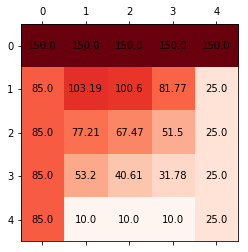

In [10]:
import matplotlib.pyplot as plt

row = np.size(Placa_solucion,0)

fig, ax = plt.subplots()

min_val, max_val = np.min(M), np.max(M)

intersection_matrix = Placa_solucion

ax.matshow(intersection_matrix, cmap=plt.cm.Reds)

for i in range(row):
    for j in range(row):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

### EJEMPLO 2.- TEMPERATURA DE UNA PLACA CALIENTE CON UN MAYOR NÚMERO DE INTERVALOS.

### _Calcule la temperatura de la placa caliente aumentando el número de puntos que se mostrarón en la figura pasada:_

### SOLUCIÓN.

#### Primero definimos una función que nos permita expandir la placa al número de intervalos iguales que queramos:

In [11]:
def MatrizAmpliada(n_int,Tup,Tdwn,Tlft,Trgt):
    '''
    Devuelve la matriz ampliada a "n_int" intervalos con las condiciones de frontera que establece el problema.

    Inputs:
    n_int -- Número de divisiones en la placa.
    Tup   -- Temperatura superior de la placa. 
    Tdwn  -- Temperatura inferior de la placa.
    Tlft  -- Temperatura izquierda de la placa.
    Trgt  -- Temperatura derecha de la placa.
    
    Output:
    Matriz Ampliada.

    Programó:
    Ing. Josue Emmanuel Cruz Barragan
    '''
    M = np.zeros((n_int,n_int))
    M[0][:]=Tup
    M[-1][:]=Tdwn
    M=np.transpose(M)
    M[0][:]=Tlft
    M[-1][:]=Trgt
    M=np.transpose(M)
    return M

### a) Datos:

In [12]:
# Definimos las condiciones de frontera.
Tup = 150.0
Tdwn = 10.0
Tlft = 85.0
Trgt = 25.0

# Se define el número de intervalos a dividir la placa.
n_int = 50

#### Ensamblamos la matriz de la Placa

In [13]:
M = MatrizAmpliada(n_int,Tup,Tdwn,Tlft,Trgt)
print('Placa dicretizada:\n')
print(M)

Placa dicretizada:

[[ 85. 150. 150. ... 150. 150.  25.]
 [ 85.   0.   0. ...   0.   0.  25.]
 [ 85.   0.   0. ...   0.   0.  25.]
 ...
 [ 85.   0.   0. ...   0.   0.  25.]
 [ 85.   0.   0. ...   0.   0.  25.]
 [ 85.  10.  10. ...  10.  10.  25.]]


### b) Resultados:

In [14]:
Placa_solucion = EDP_Eliptica(M)
print('Placa solucionada:\n')
print(Placa_solucion)

Placa solucionada:

[[ 85.   150.   150.   ... 150.   150.    25.  ]
 [ 85.   117.38 130.11 ... 112.08  87.44  25.  ]
 [ 85.   104.42 117.03 ...  87.25  62.67  25.  ]
 ...
 [ 85.    62.34  47.54 ...  17.76  20.6   25.  ]
 [ 85.    47.51  32.7  ...  14.66  17.56  25.  ]
 [ 85.    10.    10.   ...  10.    10.    25.  ]]


### c) Gráfica de colores en función de la temperatura:

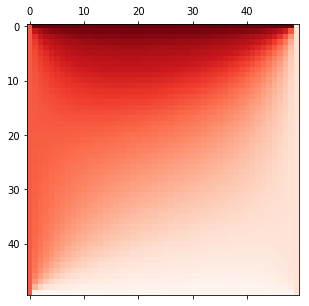

In [15]:
import matplotlib.pyplot as plt
tamano = 5
fig, ax = plt.subplots(figsize=(tamano,tamano))
min_val, max_val = np.min(M), np.max(M)
intersection_matrix = Placa_solucion
ax.matshow(intersection_matrix, cmap=plt.cm.Reds)
plt.show()